In [1]:
%cd yolov5
import torch
from yolov5 import utils
import torch
import utils
from IPython import display
from IPython.display import clear_output
from pathlib import Path
import yaml
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob


%matplotlib inline
display = utils.notebook_init()

YOLOv5 🚀 v6.2-43-gdb2ee5f Python-3.6.13 torch-1.10.1 CPU


Setup complete ✅ (16 CPUs, 12.4 GB RAM, 77.0/251.0 GB disk)


In [2]:
!python train.py --batch 8 --epochs 100  --data 'pothole_data.yaml' --weights 'yolov5s6.pt' --project 'Pracaprzejsciowa' --name 'feature_extraction' --cache --freeze 12 --device 0

train: weights=yolov5s6.pt, cfg=, data=pothole_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=Pracaprzejsciowa, name=feature_extraction, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[12], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (15/15), done.
remote: Total 19 (delta 15), reused 15 (delta 15), pack-reused 4
Unpacking objects: 100% (19/19), 5.18 KiB | 663.00 KiB/s, done.
From https://github.com/ultralytics/yolov5
   db2ee5f..06831aa  master     -> origin/master
github: ⚠️ YOLOv5 is out of date by 3 commits. Use `git pull` or `git clone ht

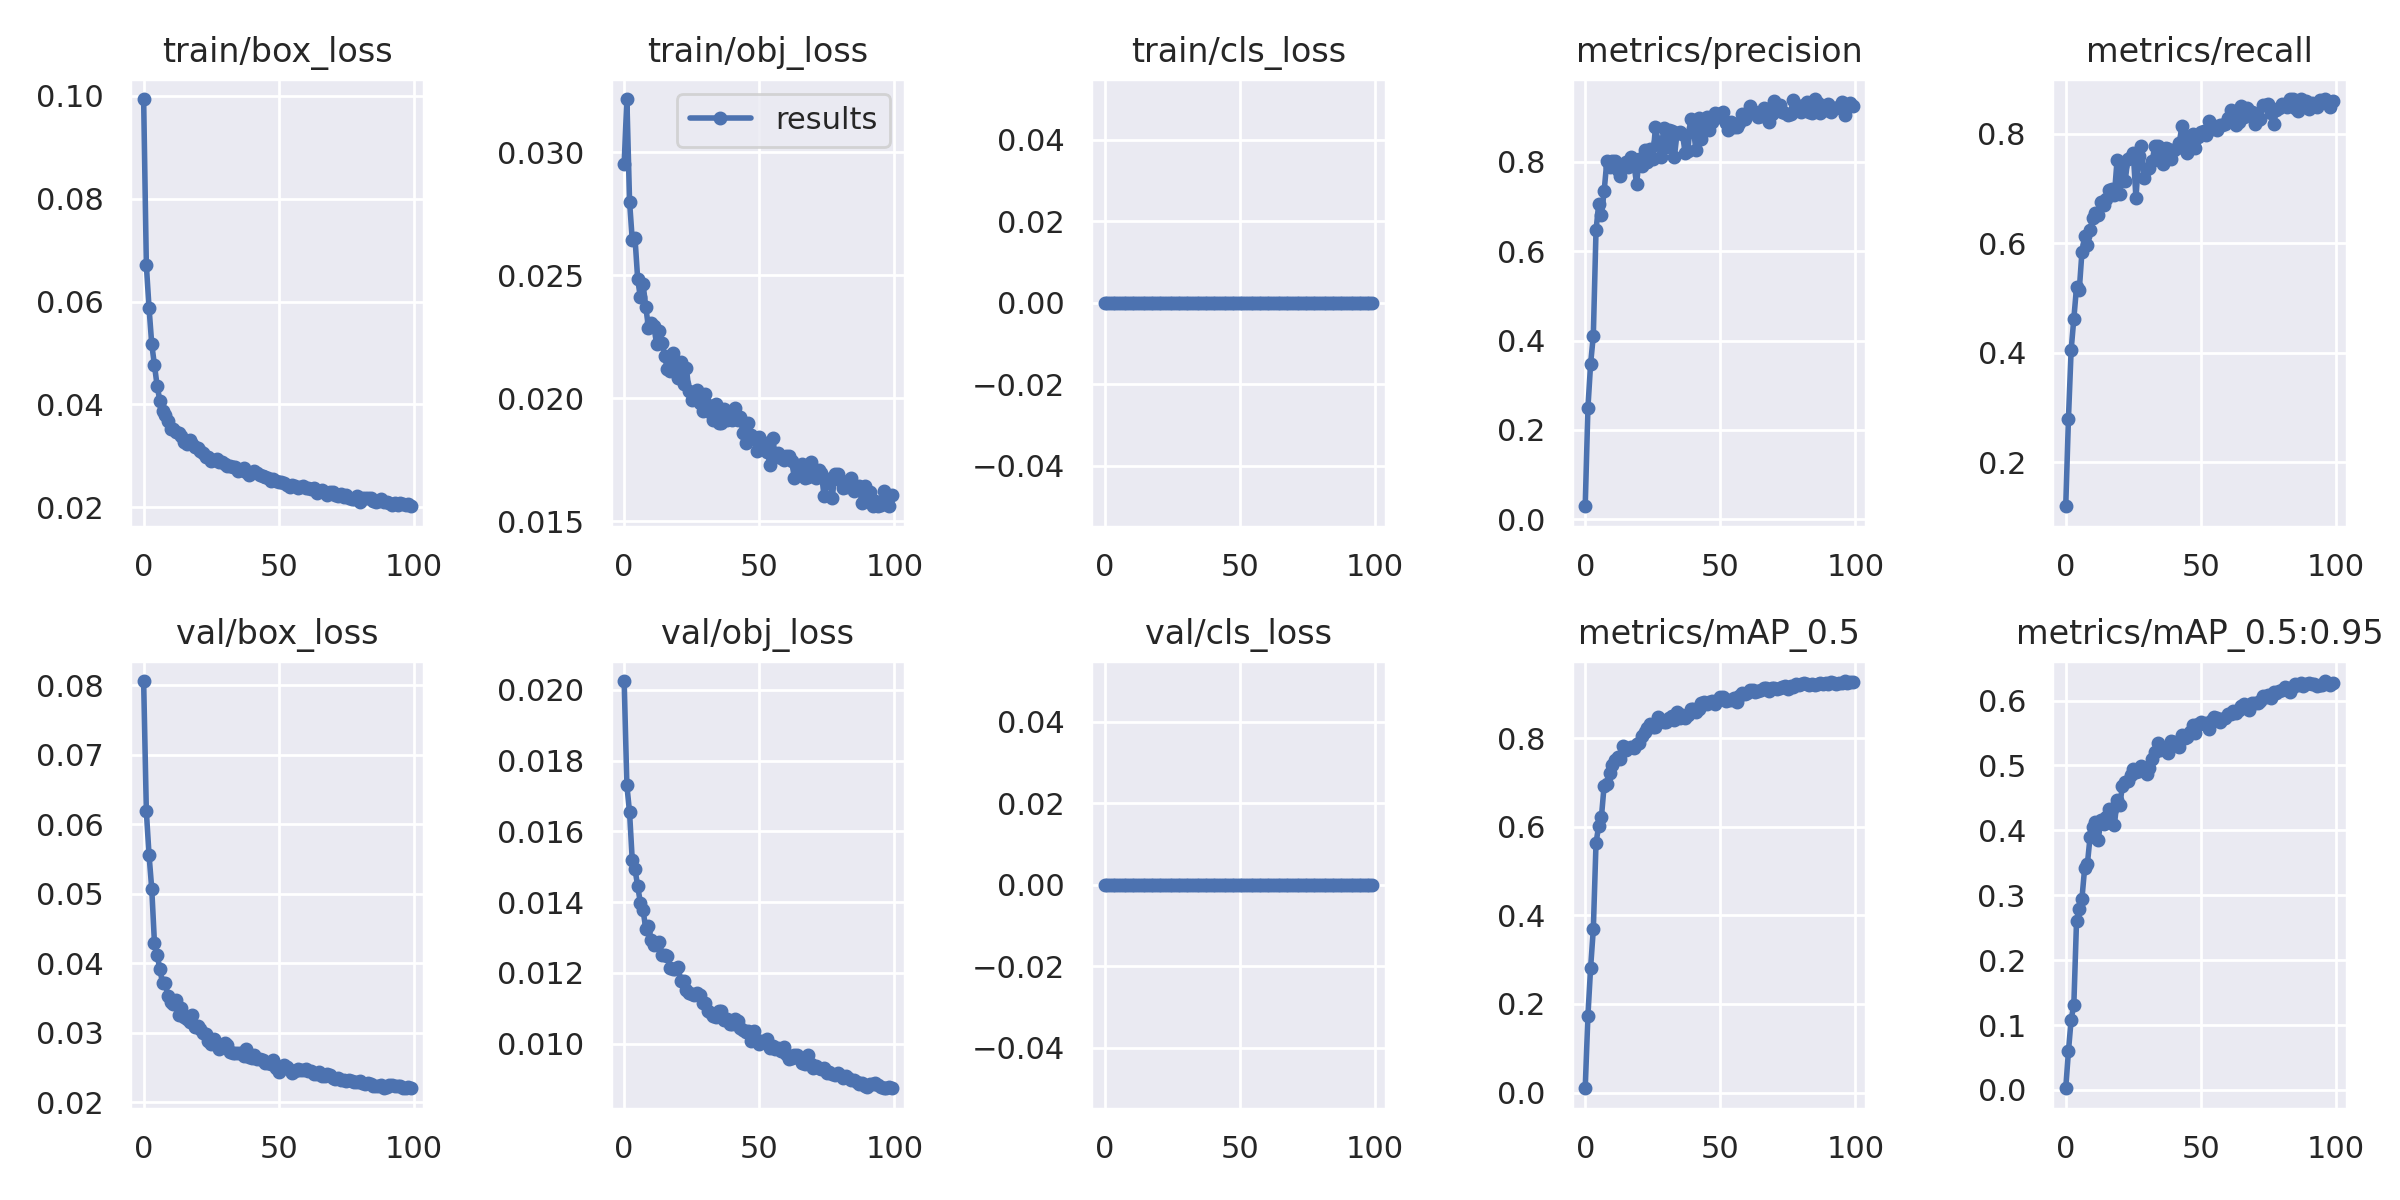

In [3]:
display.Image(f"Pracaprzejsciowa/feature_extraction/results.png")

In [4]:
!python train.py --hyp 'Pracaprzejsciowa/feature_extraction/hyp.yaml' --batch 8 --epochs 100 --data 'pothole_data.yaml' --weights 'Pracaprzejsciowa/feature_extraction/weights/best.pt' --project 'Pracaprzejsciowa' --name 'fine-tuning' --cache

train: weights=Pracaprzejsciowa/feature_extraction/weights/best.pt, cfg=, data=pothole_data.yaml, hyp=Pracaprzejsciowa/feature_extraction/hyp.yaml, epochs=100, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=Pracaprzejsciowa, name=fine-tuning, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 3 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v6.2-43-gdb2ee5f Python-3.7.13 torch-1.10.0 CUDA:0 (NVIDIA GeForce RTX 3070, 8192MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, war

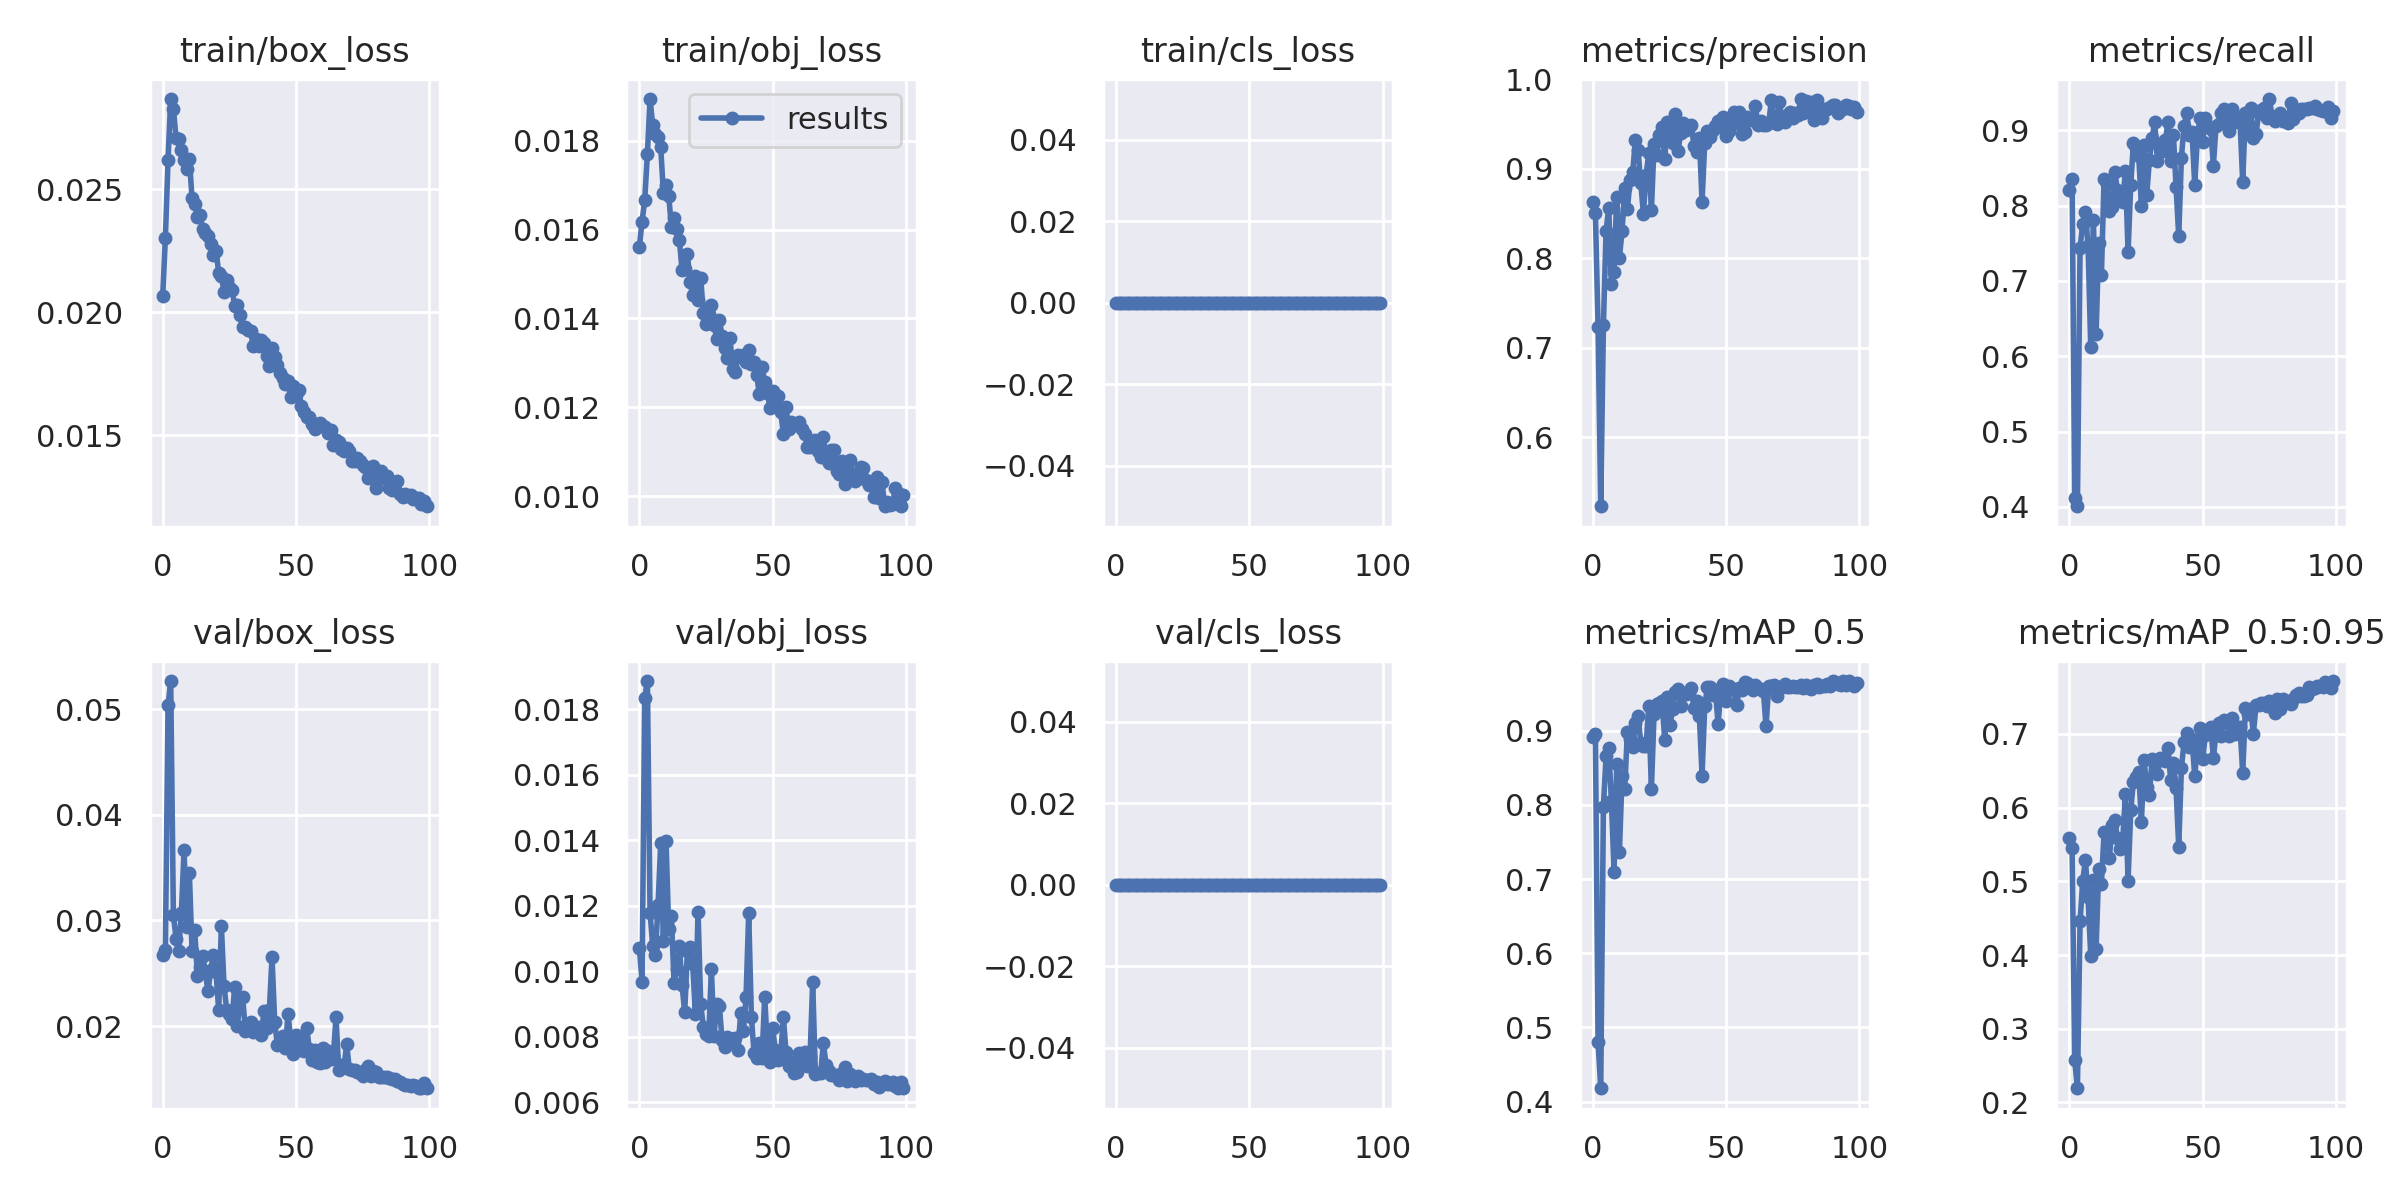

In [5]:
display.Image(f"Pracaprzejsciowa/fine-tuning/results.png")

In [6]:
!python val.py --weights 'Pracaprzejsciowa/fine-tuning/weights/best.pt' --batch 64 --data 'pothole_data.yaml' --task test --project 'Pracaprzejsciowa' --name 'validation_on_test_data' --augment


val: data=/home/krzysztof/Potholedetector/Pracaprzejsciowa/yolov5/data/pothole_data.yaml, weights=['Pracaprzejsciowa/fine-tuning/weights/best.pt'], batch_size=64, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=test, device=, workers=8, single_cls=False, augment=True, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=Pracaprzejsciowa, name=validation_on_test_data, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.2-43-gdb2ee5f Python-3.7.13 torch-1.10.0 CUDA:0 (NVIDIA GeForce RTX 3070, 8192MiB)

Fusing layers... 
Model summary: 280 layers, 12308200 parameters, 0 gradients, 16.1 GFLOPs
test: Scanning '/home/krzysztof/Potholedetector/Pracaprzejsciowa/yolov5/../DATA/
test: WARNING: Cache directory /home/krzysztof/Potholedetector/Pracaprzejsciowa/yolov5/../DATA/data/labels is not writeable: [Errno 13] Permission denied: '/home/krzysztof/Potholedetector/Pracaprzejsciowa/yolov5/../DATA/data/labels/test.cache.npy'
                 Class     Images  I

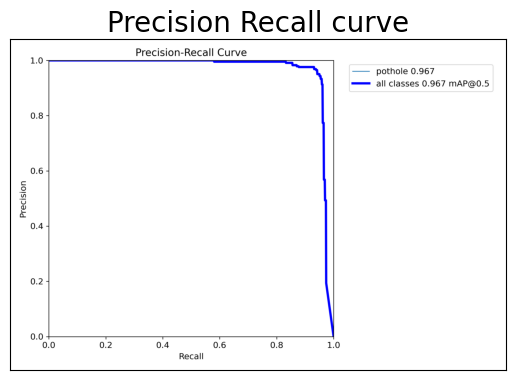

In [7]:
plt.plot(figsize=(20,20))
plt.title('Precision Recall curve', fontsize=20)
plt.tick_params(left = False, right = False , labelleft = False, labelbottom = False, bottom = False)
plt.imshow(mpimg.imread('Pracaprzejsciowa/validation_on_test_data/PR_curve.png'))

In [11]:
!python detect.py --weights 'Pracaprzejsciowa/fine-tuning/weights/best.pt'  --conf 0.6 --source '../pothole70kmh.mp4' --project 'Pracaprzejsciowa' --name 'detect_test' --augment --line=3

detect: weights=['Pracaprzejsciowa/fine-tuning/weights/best.pt'], source=../pothole70kmh.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.6, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=True, visualize=False, update=False, project=Pracaprzejsciowa, name=detect_test, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.2-43-gdb2ee5f Python-3.7.13 torch-1.10.0 CUDA:0 (NVIDIA GeForce RTX 3070, 8192MiB)

Fusing layers... 
Model summary: 280 layers, 12308200 parameters, 0 gradients, 16.1 GFLOPs
video 1/1 (1/823) /home/krzysztof/Potholedetector/Pracaprzejsciowa/pothole70kmh.mp4: 384x640 (no detections), 37.0ms
video 1/1 (2/823) /home/krzysztof/Potholedetector/Pracaprzejsciowa/pothole70kmh.mp4: 384x640 (no detections), 25.6ms
video 1/1 (3/823) /home/krzysztof/Potholedetector/Pracaprzejsciowa/pothole70kmh.mp4: 384x640 

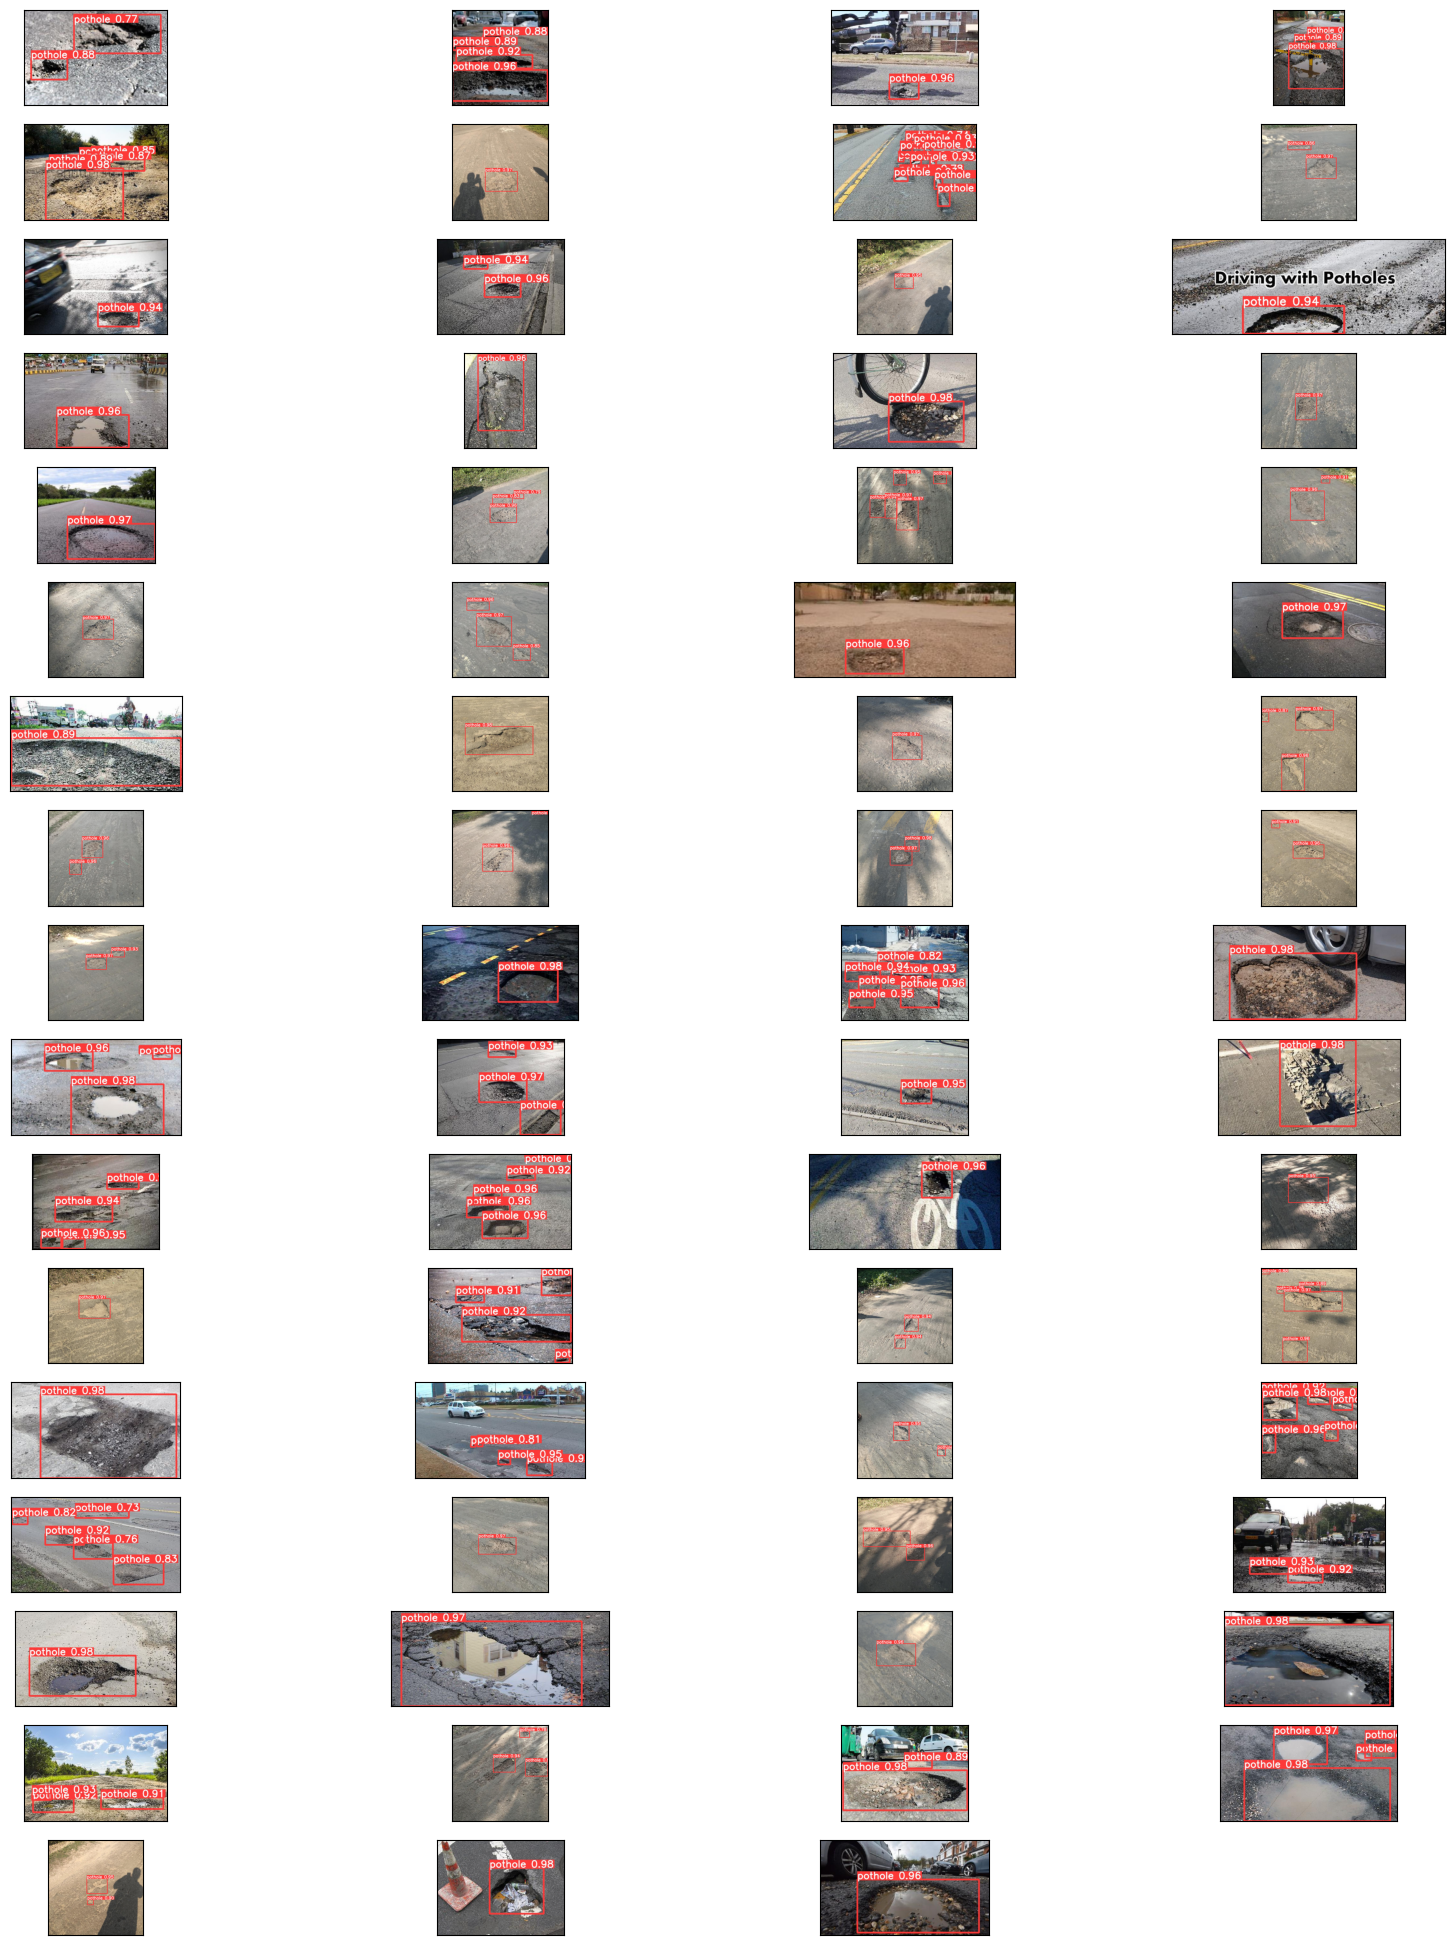

In [9]:
detect_path = r'Pracaprzejsciowa/detect_test'

images = []
for img_path in glob.glob(detect_path + '/*.jpg'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,25))
columns = 4
for i, image in enumerate(images):
    plt.subplot((int(len(images) / columns + 1)), columns, i + 1)
    plt.tick_params(left = False, right = False , labelleft = False, labelbottom = False, bottom = False)
    plt.imshow(image)